In [1]:
import keras
import matplotlib.pyplot as plt
import cv2

Using TensorFlow backend.


In [2]:
import tensorflow as tf
print(tf.__version__)

#config = tf.ConfigProto()
#config.gpu_options.allow_growth = True
#sess = tf.Session(config=config)

1.15.0


In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

Normalising the data to values from 0-1

In [6]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train, y_train , epochs = 3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 10s 162us/sample - loss: 0.3002 - acc: 0.9107
Epoch 2/3
60000/60000 [==============================] - 9s 157us/sample - loss: 0.1251 - acc: 0.9619
Epoch 3/3
60000/60000 [==============================] - 9s 154us/sample - loss: 0.0868 - acc: 0.9736


In [7]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print('loss function = ',val_loss, 'Model accuracy',val_acc)

10000/10000 [==============================] - 1s 64us/sample - loss: 0.0920 - acc: 0.9712
loss function =  0.09201911906180903 Model accuracy 0.9712


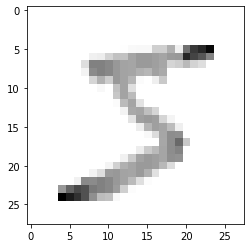

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [8]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

print(x_train[0])

Its not necessary to use normalization but it makes a difference to how the neural network learns

In [9]:
model.save('epic_num_reader.model')

In [10]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


# Invert colors of image

In [15]:
from PIL import Image
import PIL.ImageOps

image = Image.open('sample.jpg')
image = PIL.ImageOps.invert(image)
image.save('inv_test.jpg')

In [16]:
img_array = cv2.imread('inv_test.jpg' ,cv2.IMREAD_GRAYSCALE)

IMG_SIZE = 28
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
sample = tf.keras.utils.normalize(new_array, axis = 1)
sample_pred = sample.reshape(1,28,28)

In [17]:
predictions = new_model.predict(sample_pred)
print(predictions)

[[1.4086474e-05 6.5228625e-05 3.2092849e-04 9.8042279e-01 9.9689771e-07
  6.9849712e-06 1.5662746e-08 8.6895060e-03 1.8431738e-03 8.6364411e-03]]


In [18]:
import numpy as np

print(np.argmax(predictions[0]))

3


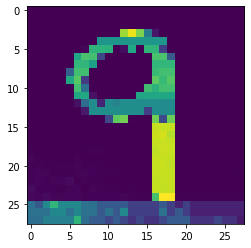

In [21]:
plt.imshow(sample)
plt.show()